<a href="https://colab.research.google.com/github/nilamu14/RNN-LSTM-ENCODER-DECODER/blob/main/machine_learning_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Loading the packages ##

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [55]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [56]:
import re

In [57]:
# Global Parameters
stop_words = set(stopwords.words('english'))

In [58]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Loading the dataset ##

In [59]:
df=pd.read_csv('/content/gdrive/MyDrive/test_data.csv')

In [60]:
df

,tweet_id,sentiment,name,text,tweet_created,tweet_location,user_timezone
0,1,neutral,cairdin,What @dhepburn said.,24/02/15 11:35,NaN,Eastern Time (US & Canada)
1,2,positive,jnardino,plus you've added commercials to the experienc...,24/02/15 11:15,NaN,Pacific Time (US & Canada)
2,3,neutral,yvonnalynn,I didn't today... Must mean I need to take ano...,24/02/15 11:15,Lets Play,Central Time (US & Canada)
3,4,negative,jnardino,"it's really aggressive to blast obnoxious ""ent...",24/02/15 11:15,NaN,Pacific Time (US & Canada)
4,5,negative,jnardino,and it's a really big bad thing about it,24/02/15 11:14,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...
14635,14636,positive,KristenReenders,thank you we got on a different flight to Chic...,22/02/15 12:01,NaN,NaN
14636,14637,negative,itsropes,leaving over 20 minutes Late Flight. No warnin...,22/02/15 11:59,Texas,NaN
14637,14638,neutral,sanyabun,Please bring American Airlines to #BlackBerry10,22/02/15 11:59,"Nigeria,lagos",NaN
14638,14639,negative,SraJackson,"you have my money, you change my flight, and d...",22/02/15 11:59,New Jersey,Eastern Time (US & Canada)


## EDA and Removal of irrelavant columns ##

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        14640 non-null  int64 
 1   sentiment       14640 non-null  object
 2   name            14640 non-null  object
 3   text            14640 non-null  object
 4   tweet_created   14640 non-null  object
 5   tweet_location  9907 non-null   object
 6   user_timezone   9820 non-null   object
dtypes: int64(1), object(6)
memory usage: 800.8+ KB


In [62]:
## Checking the missing value ##
df.isnull().any()

tweet_id          False
sentiment         False
name              False
text              False
tweet_created     False
tweet_location     True
user_timezone      True
dtype: bool

In [63]:
print('shape of train dataset',df.shape)
df.sentiment.value_counts()

shape of train dataset (14640, 7)


negative    9178
neutral     3099
positive    2363
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


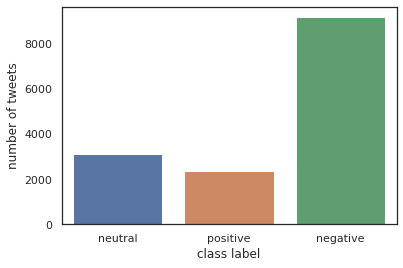

In [64]:
import seaborn as sns
sns.countplot(df.sentiment,)
plt.xlabel('class label')
plt.ylabel('number of tweets')
plt.show()

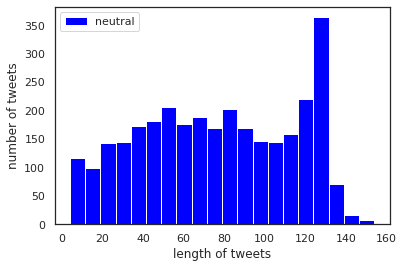

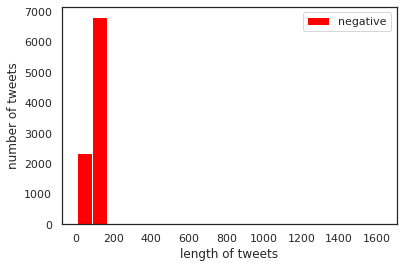

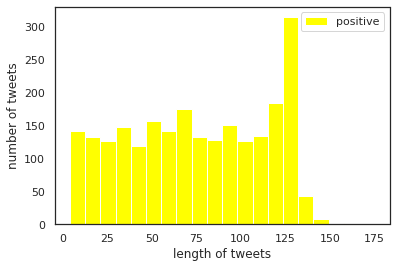

In [65]:
## length of each twitter across the categories ##

plt.hist(df[df['sentiment']=='neutral'].text.str.len(),color='blue',bins=20,label='neutral')
plt.legend()
plt.xlabel('length of tweets')
plt.ylabel('number of tweets')
plt.show()
plt.hist(df[df['sentiment']=='negative'].text.str.len(),color='red',bins=20,label='negative')
plt.legend()
plt.xlabel('length of tweets')
plt.ylabel('number of tweets')
plt.show()
plt.hist(df[df['sentiment']=='positive'].text.str.len(),color='yellow',bins=20,label='positive')
plt.legend()
plt.xlabel('length of tweets')
plt.ylabel('number of tweets')
plt.show()

In [66]:
## Top Locations of the tweet ##

In [67]:
Top_Location_Of_tweet= df['tweet_location'].value_counts().head(10)

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')

In [68]:
Top_Location_Of_tweet.head(10)

Boston, MA           157
New York, NY         156
Washington, DC       150
New York             127
USA                  126
Chicago              104
Los Angeles, CA       96
New York City         96
NYC                   95
San Francisco, CA     91
Name: tweet_location, dtype: int64

In [69]:
Top_Location_Of_tweet_df=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet_df.reset_index(inplace=True)
Top_Location_Of_tweet_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet_df

,Location,tweet_location
0,"Boston, MA",157
1,"New York, NY",156
2,"Washington, DC",150
3,New York,127
4,USA,126
5,Chicago,104
6,"Los Angeles, CA",96
7,New York City,96
8,NYC,95
9,"San Francisco, CA",91


[Text(0, 0, 'Boston, MA'),
 Text(0, 0, 'New York, NY'),
 Text(0, 0, 'Washington, DC'),
 Text(0, 0, 'New York'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'Chicago'),
 Text(0, 0, 'Los Angeles, CA'),
 Text(0, 0, 'New York City'),
 Text(0, 0, 'NYC'),
 Text(0, 0, 'San Francisco, CA')]

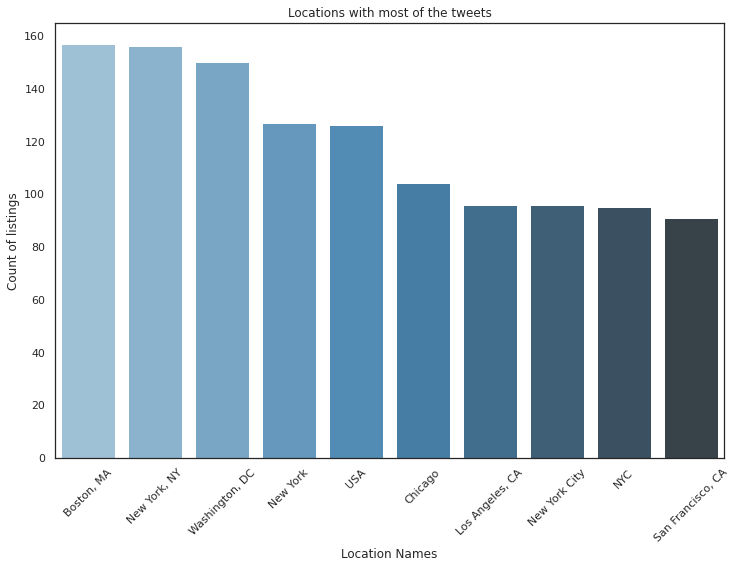

In [70]:
viz_1=sns.barplot(x="Location", y="tweet_location", data=Top_Location_Of_tweet_df,
                 palette='Blues_d')
viz_1.set_title('Locations with most of the tweets')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Location Names')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [71]:
## removal of tweet_id,name,tweet_created,tweet_location, user_timezone as it will not add any value ##
df = df.drop(['name','tweet_created','tweet_location','user_timezone'],axis=1)

In [72]:
df

,tweet_id,sentiment,text
0,1,neutral,What @dhepburn said.
1,2,positive,plus you've added commercials to the experienc...
2,3,neutral,I didn't today... Must mean I need to take ano...
3,4,negative,"it's really aggressive to blast obnoxious ""ent..."
4,5,negative,and it's a really big bad thing about it
...,...,...,...
14635,14636,positive,thank you we got on a different flight to Chic...
14636,14637,negative,leaving over 20 minutes Late Flight. No warnin...
14637,14638,neutral,Please bring American Airlines to #BlackBerry10
14638,14639,negative,"you have my money, you change my flight, and d..."


## Preprocessing the text data ##

Removing Twitter Handles (@user)

Removing urls from text

Removing Punctuations, Numbers, and Special Characters

Convert the word to lowercase

Remove Stopwords

Stemming the word

Lemmatization

In [73]:
## Remove Unwanted patterns from tweets ##
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [74]:
## Removing twitter handles ##
df['text'] = np.vectorize(remove_pattern)(df['text'], '@[\w]*')
df.head(10)

,tweet_id,sentiment,text
0,1,neutral,What said.
1,2,positive,plus you've added commercials to the experienc...
2,3,neutral,I didn't today... Must mean I need to take ano...
3,4,negative,"it's really aggressive to blast obnoxious ""ent..."
4,5,negative,and it's a really big bad thing about it
5,6,negative,seriously would pay $30 a flight for seats tha...
6,7,positive,"yes, nearly every time I fly VX this __ar worm..."
7,8,neutral,Really missed a prime opportunity for Men With...
8,9,positive,"Well, I didn't_but NOW I DO! :-D"
9,10,positive,"it was amazing, and arrived an hour early. You..."


In [75]:
## Removing punctuation , numbers and special characters ##
df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ")
df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,tweet_id,sentiment,text
0,1,neutral,What said
1,2,positive,plus you ve added commercials to the experienc...
2,3,neutral,I didn t today Must mean I need to take ano...
3,4,negative,it s really aggressive to blast obnoxious ent...
4,5,negative,and it s a really big bad thing about it
5,6,negative,seriously would pay a flight for seats tha...
6,7,positive,yes nearly every time I fly VX this ar worm...
7,8,neutral,Really missed a prime opportunity for Men With...
8,9,positive,Well I didn t but NOW I DO D
9,10,positive,it was amazing and arrived an hour early You...


In [76]:
## Lowering the characters ##
df['text'] = df['text'].str.lower()
df.head()

,tweet_id,sentiment,text
0,1,neutral,what said
1,2,positive,plus you ve added commercials to the experienc...
2,3,neutral,i didn t today must mean i need to take ano...
3,4,negative,it s really aggressive to blast obnoxious ent...
4,5,negative,and it s a really big bad thing about it


Ordinal encoding sentiment levels 

In [77]:
#Creating the dependent variable class
factor = pd.factorize(df['sentiment'])
df.sentiment = factor[0]
definitions = factor[1]
print(df.sentiment.head())
print(definitions)

0    0
1    1
2    0
3    2
4    2
Name: sentiment, dtype: int64
Index(['neutral', 'positive', 'negative'], dtype='object')


In [78]:
df.head()

,tweet_id,sentiment,text
0,1,0,what said
1,2,1,plus you ve added commercials to the experienc...
2,3,0,i didn t today must mean i need to take ano...
3,4,2,it s really aggressive to blast obnoxious ent...
4,5,2,and it s a really big bad thing about it


Text Normalization 

In [79]:
## We will tokenize the tweets which means we split the tweets or string of text into tokens(individual words or terms) ##
Tokenize_tweet = df['text'].apply(lambda x: x.split())
Tokenize_tweet.head(10)

0                                         [what, said]
1    [plus, you, ve, added, commercials, to, the, e...
2    [i, didn, t, today, must, mean, i, need, to, t...
3    [it, s, really, aggressive, to, blast, obnoxio...
4    [and, it, s, a, really, big, bad, thing, about...
5    [seriously, would, pay, a, flight, for, seats,...
6    [yes, nearly, every, time, i, fly, vx, this, a...
7    [really, missed, a, prime, opportunity, for, m...
8               [well, i, didn, t, but, now, i, do, d]
9    [it, was, amazing, and, arrived, an, hour, ear...
Name: text, dtype: object

For normalization, we will use nltk's PorterStemmer() function

In [80]:
from nltk.stem.porter import *

stemmer = PorterStemmer()
Tokenize_tweet = Tokenize_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

We need to combine the tokens.

In [81]:
for i in range(len(Tokenize_tweet)):
    Tokenize_tweet[i] = ' '.join(Tokenize_tweet[i])
    
df['preprocessed_tweets'] = Tokenize_tweet

In [82]:
df.head(10)

,tweet_id,sentiment,text,preprocessed_tweets
0,1,0,what said,what said
1,2,1,plus you ve added commercials to the experienc...,plu you ve ad commerci to the experi tacki
2,3,0,i didn t today must mean i need to take ano...,i didn t today must mean i need to take anoth ...
3,4,2,it s really aggressive to blast obnoxious ent...,it s realli aggress to blast obnoxi entertain ...
4,5,2,and it s a really big bad thing about it,and it s a realli big bad thing about it
5,6,2,seriously would pay a flight for seats tha...,serious would pay a flight for seat that didn ...
6,7,1,yes nearly every time i fly vx this ar worm...,ye nearli everi time i fli vx thi ar worm won ...
7,8,0,really missed a prime opportunity for men with...,realli miss a prime opportun for men without h...
8,9,1,well i didn t but now i do d,well i didn t but now i do d
9,10,1,it was amazing and arrived an hour early you...,it wa amaz and arriv an hour earli you re too ...


Data Exploration - A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes

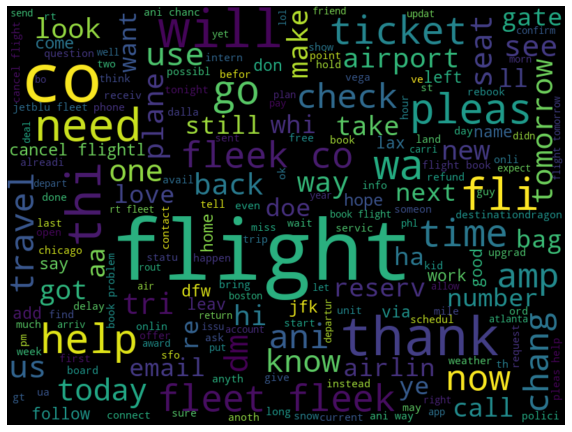

In [83]:
## Neutral tweets ##
norm_words = ' '.join([text for text in df['preprocessed_tweets'][df['sentiment'] == 0]])

wordcloud = WordCloud(width = 800, height = 600, random_state = 21, max_font_size = 120).generate(norm_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


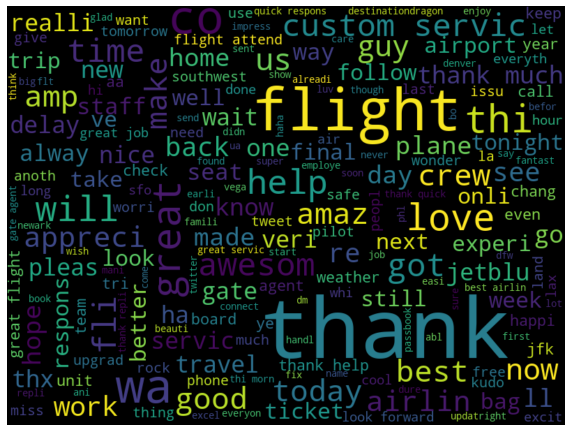

In [84]:
## positive tweets ##
norm_words = ' '.join([text for text in df['preprocessed_tweets'][df['sentiment'] == 1]])

wordcloud = WordCloud(width = 800, height = 600, random_state = 21, max_font_size = 120).generate(norm_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

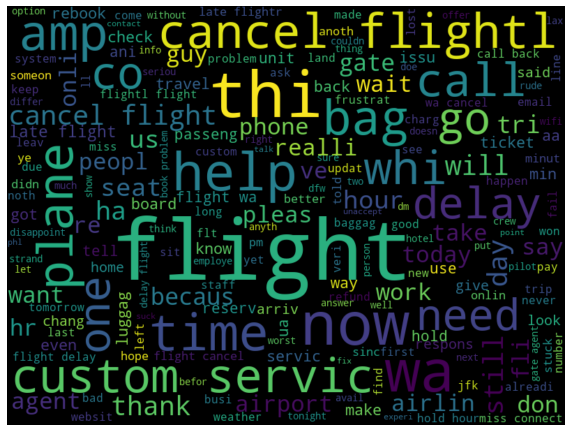

In [85]:
## negative tweets ##
norm_words = ' '.join([text for text in df['preprocessed_tweets'][df['sentiment'] == 2]])

wordcloud = WordCloud(width = 800, height = 600, random_state = 21, max_font_size = 120).generate(norm_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Impact of hashtags on tweet sentiments
Hashtags in twitter helps us in distinguishing tweets into different sentiments. They are synonymous with the ongoing trends on twitter at any particular point in time.

In [86]:
def hashtag(x):
    hashtags = []
    
    #Loop over words in tweets
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        
    return hashtags

In [87]:
#Extract hashtags from neutral tweets
Ht_Normal = hashtag(df['preprocessed_tweets'][df['sentiment'] == 0])

#Extract hashtags from negative tweets
Ht_Negative = hashtag(df['preprocessed_tweets'][df['sentiment'] == 2])

#Extract hashtags from positive tweets
Ht_Positive = hashtag(df['preprocessed_tweets'][df['sentiment'] == 1])

#Unnesting list
Ht_Normal = sum(Ht_Normal, [])
Ht_Negative = sum(Ht_Negative, [])
Ht_Positive = sum(Ht_Positive, [])

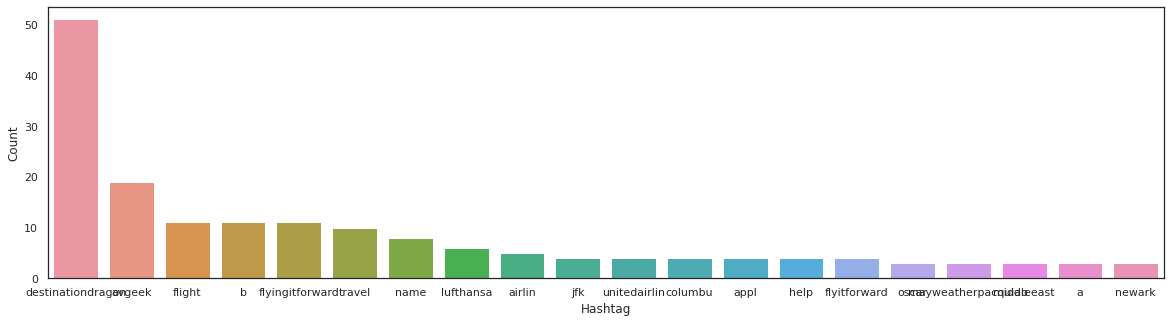

In [88]:

## Neutral tweets
a = nltk.FreqDist(Ht_Normal)
b = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

#Select frequent hashtags
#Here we use 20 hashtags i.e. n=20

b = b.nlargest(columns="Count", n=20)
plt.figure(figsize=(20, 5))
ax = sns.barplot(data=b, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.show()

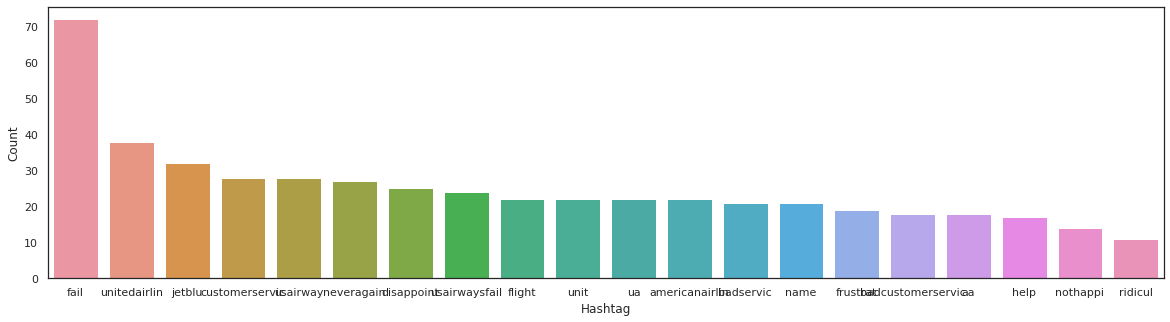

In [89]:
## Negative tweets 
c = nltk.FreqDist(Ht_Negative)
d = pd.DataFrame({'Hashtag': list(c.keys()),
                  'Count': list(c.values())})

#Select frequent hashtags
#Here we use 20 hashtags i.e. n=20

d = d.nlargest(columns="Count", n=20)
plt.figure(figsize=(20, 5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")

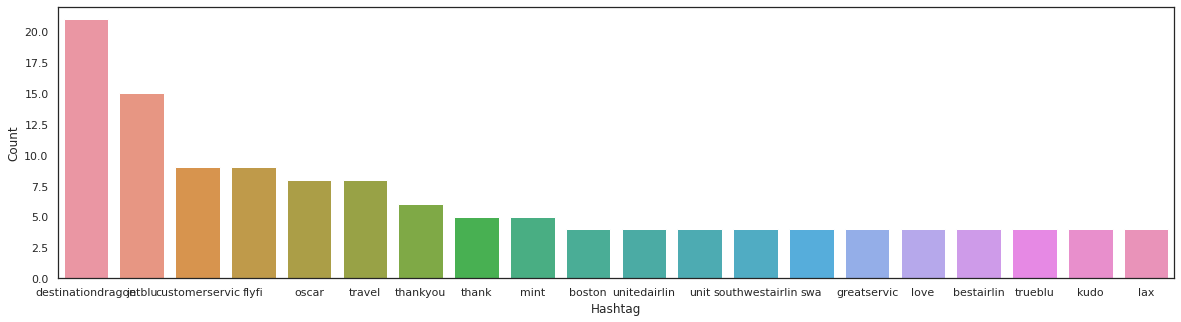

In [90]:
## positive tweets ##

e = nltk.FreqDist(Ht_Positive)
f = pd.DataFrame({'Hashtag': list(e.keys()),
                  'Count': list(e.values())})

#Select frequent hashtags
#Here we use 20 hashtags i.e. n=20

f = f.nlargest(columns="Count", n=20)
plt.figure(figsize=(20, 5))
ax = sns.barplot(data=f, x="Hashtag", y="Count")

In [91]:
df.head()

,tweet_id,sentiment,text,preprocessed_tweets
0,1,0,what said,what said
1,2,1,plus you ve added commercials to the experienc...,plu you ve ad commerci to the experi tacki
2,3,0,i didn t today must mean i need to take ano...,i didn t today must mean i need to take anoth ...
3,4,2,it s really aggressive to blast obnoxious ent...,it s realli aggress to blast obnoxi entertain ...
4,5,2,and it s a really big bad thing about it,and it s a realli big bad thing about it


In [92]:
## Selecting the necessary columns and removing unwanted/irrelvant columns ##
df = df.drop(['tweet_id', 'text'],axis=1)

In [93]:
df

,sentiment,preprocessed_tweets
0,0,what said
1,1,plu you ve ad commerci to the experi tacki
2,0,i didn t today must mean i need to take anoth ...
3,2,it s realli aggress to blast obnoxi entertain ...
4,2,and it s a realli big bad thing about it
...,...,...
14635,1,thank you we got on a differ flight to chicago
14636,2,leav over minut late flight no warn or commun ...
14637,0,pleas bring american airlin to #blackberri
14638,2,you have my money you chang my flight and don ...


Bag Of Words 

Bag Of Words Model 

Bag-of-words model is a way of extracting features from text for use in machine learning algorithms. This model learns a vocabulary form all of the documents, then models each document by counting the number of times each word appears. For more information, check out Bag of Words.
I have used CountVectorizer which means it works on Term Frequency i.e. counting the occurences of tokens and building a sparse matrix of documents x tokens.

In [94]:
from sklearn.feature_extraction.text import  CountVectorizer
import gensim
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))

In [95]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(df,test_size = 0.2,random_state=0,stratify = df.sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (11712, 2)
valid shape :  (2928, 2)


In [96]:
vectorizer = CountVectorizer(ngram_range=(1,2),max_df=0.7, min_df=0.1, max_features = 1000, stop_words='english')

In [97]:
X_train = vectorizer.fit_transform(train.preprocessed_tweets.values)
X_valid = vectorizer.transform(valid.preprocessed_tweets.values)


In [98]:
y_train = train.sentiment.values
y_valid = valid.sentiment.values

In [99]:
print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (11712, 2)
X_train.shape :  (2928, 2)
y_train.shape :  (11712,)
y_valid.shape :  (2928,)


Naive Bayes Classifier for MULTICLASS Classification

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
from gensim.models.doc2vec import LabeledSentence
import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import warnings 
warnings.filterwarnings("ignore")

In [102]:
from sklearn.naive_bayes import MultinomialNB
naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.6676058743169399
Validation accuracy Score :  0.6693989071038251
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.37      0.68      0.48       259
           2       0.97      0.67      0.79      2669

    accuracy                           0.67      2928
   macro avg       0.45      0.45      0.43      2928
weighted avg       0.92      0.67      0.76      2928



Stochastic Gradient Descent-SGD Classifier( MULTICLASS CLASSIFICATION)

In [103]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.6703381147540983
Validation accuracy Score :  0.6724726775956285
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.43      0.66      0.52       311
           2       0.96      0.67      0.79      2617

    accuracy                           0.67      2928
   macro avg       0.46      0.44      0.44      2928
weighted avg       0.91      0.67      0.76      2928



Extreme Gradient Boosting ( For Multiclass Classification)

In [104]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

Training accuracy Score    :  0.6717042349726776
Validation accuracy Score :  0.6745218579234973
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.43      0.67      0.52       302
           2       0.97      0.67      0.79      2626

    accuracy                           0.67      2928
   macro avg       0.46      0.45      0.44      2928
weighted avg       0.91      0.67      0.77      2928



Support vector machine( For Multiclass Classification)

In [105]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=1, probability=True)

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.6703381147540983
Validation accuracy Score :  0.6724726775956285
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.43      0.66      0.52       311
           2       0.96      0.67      0.79      2617

    accuracy                           0.67      2928
   macro avg       0.46      0.44      0.44      2928
weighted avg       0.91      0.67      0.76      2928



CATBOOST MODEL (For Multiclass Classification)

In [106]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 76.6 MB 1.3 MB/s 
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [107]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [108]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_valid, y_valid), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [109]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

Training accuracy Score    :  0.6717042349726776
Validation accuracy Score :  0.6745218579234973
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.43      0.67      0.52       302
           2       0.97      0.67      0.79      2626

    accuracy                           0.67      2928
   macro avg       0.46      0.45      0.44      2928
weighted avg       0.91      0.67      0.77      2928



Logistic Regression(For Multiclass Classification)


In [110]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.6716188524590164
Validation accuracy Score :  0.6745218579234973
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.43      0.67      0.53       304
           2       0.97      0.67      0.79      2624

    accuracy                           0.67      2928
   macro avg       0.47      0.45      0.44      2928
weighted avg       0.91      0.67      0.77      2928



RANDOM FOREST CLASSIFIER (For Multiclass Classification)

In [111]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  0.6717042349726776
Validation accuracy Score :  0.6745218579234973
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.43      0.67      0.52       302
           2       0.97      0.67      0.79      2626

    accuracy                           0.67      2928
   macro avg       0.46      0.45      0.44      2928
weighted avg       0.91      0.67      0.77      2928



All the multiclass models test accuracy in descending order

In [112]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
1,Logistic Regression,0.674522
2,Random Forest,0.674522
5,XGBoost,0.674522
6,CatBoost,0.674522
0,Support Vector Machines,0.672473
4,Stochastic Gradient Decent,0.672473
3,Naive Bayes,0.669399


TF-IDF Model

TF-IDF stands for Term Frequency - Inverse Document Frequency.
In this approach, words are given weight TF-IDF measures relevance, not frequency i.e. wordcounts are replaced with TF-IDF scores across the whole dataset. It is a method for emphasizing words that occur frequently in a given document, while at the same time de-emphasizing words that occur frequently in many documents.
* Term Frequency (TF): It is a scoring of the frequency of the word in the current document. The term frequency is often divided by the document length to normalize.
* Inverse Document Frequency (IDF): It is a scoring of how rare the word is across documents. It is a measure of how rare the term is. Rarer the term, more is the IDF score.

In [113]:
TfidfVect = TfidfVectorizer(ngram_range=(1,2),max_df=0.90, min_df=2, max_features=1000, stop_words='english')


In [114]:
X_train = TfidfVect.fit_transform(train.preprocessed_tweets.values)
X_valid = TfidfVect.transform(valid.preprocessed_tweets.values)


In [115]:
y_train = train.sentiment.values
y_valid = valid.sentiment.values


In [116]:
print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (11712, 1000)
X_train.shape :  (2928, 1000)
y_train.shape :  (11712,)
y_valid.shape :  (2928,)


Naive Bayes Classifier for MULTICLASS Classification

In [117]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.7645150273224044
Validation accuracy Score :  0.7479508196721312
              precision    recall  f1-score   support

           0       0.31      0.75      0.44       261
           1       0.46      0.83      0.59       261
           2       0.97      0.74      0.84      2406

    accuracy                           0.75      2928
   macro avg       0.58      0.77      0.62      2928
weighted avg       0.87      0.75      0.78      2928



Stochastic Gradient Descent-SGD Classifier( MULTICLASS CLASSIFICATION)

In [118]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.8170252732240437
Validation accuracy Score :  0.7790300546448088
              precision    recall  f1-score   support

           0       0.48      0.68      0.56       442
           1       0.61      0.78      0.69       373
           2       0.92      0.80      0.86      2113

    accuracy                           0.78      2928
   macro avg       0.67      0.75      0.70      2928
weighted avg       0.82      0.78      0.79      2928



RANDOM FOREST CLASSIFIER (For Multiclass Classification)

In [119]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  0.9834357923497268
Validation accuracy Score :  0.7517076502732241
              precision    recall  f1-score   support

           0       0.46      0.61      0.52       466
           1       0.57      0.73      0.64       372
           2       0.90      0.79      0.84      2090

    accuracy                           0.75      2928
   macro avg       0.64      0.71      0.67      2928
weighted avg       0.79      0.75      0.76      2928



Extreme Gradient Boosting ( For Multiclass Classification)

In [120]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

Training accuracy Score    :  0.7344603825136612
Validation accuracy Score :  0.7223360655737705
              precision    recall  f1-score   support

           0       0.18      0.68      0.28       161
           1       0.54      0.75      0.62       340
           2       0.95      0.72      0.82      2427

    accuracy                           0.72      2928
   macro avg       0.56      0.72      0.58      2928
weighted avg       0.86      0.72      0.77      2928



Support vector machine( For Multiclass Classification)

In [121]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))


Training accuracy Score    :  0.9065915300546448
Validation accuracy Score :  0.7766393442622951
              precision    recall  f1-score   support

           0       0.46      0.69      0.55       412
           1       0.60      0.79      0.68       357
           2       0.93      0.79      0.86      2159

    accuracy                           0.78      2928
   macro avg       0.66      0.76      0.70      2928
weighted avg       0.82      0.78      0.79      2928



Logistic Regression(For Multiclass Classification)

In [122]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.8164275956284153
Validation accuracy Score :  0.7756147540983607
              precision    recall  f1-score   support

           0       0.49      0.65      0.56       466
           1       0.60      0.79      0.68       358
           2       0.92      0.80      0.86      2104

    accuracy                           0.78      2928
   macro avg       0.67      0.75      0.70      2928
weighted avg       0.81      0.78      0.79      2928



CATBOOST MODEL (For Multiclass Classification)

In [123]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_valid, y_valid), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [124]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

Training accuracy Score    :  0.8098531420765027
Validation accuracy Score :  0.7561475409836066
              precision    recall  f1-score   support

           0       0.37      0.66      0.47       343
           1       0.59      0.76      0.67       370
           2       0.93      0.77      0.84      2215

    accuracy                           0.76      2928
   macro avg       0.63      0.73      0.66      2928
weighted avg       0.82      0.76      0.78      2928



All the multiclass models test accuracy in descending order

In [385]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
4,Stochastic Gradient Decent,0.779030
0,Support Vector Machines,0.776639
1,Logistic Regression,0.775615
2,Random Forest,0.756489
6,CatBoost,0.756148
3,Naive Bayes,0.747951
5,XGBoost,0.722336


Word2vec

Word2vec

Word Embeddings: The objective is to redefine the high dimensional word features into low dimensional feature vectors by preserving the contextual similarity in the corpus.
Word2Vec Embedding
It is a combination of two techniques - CBOW (Continuous bag of words) and Skip-gram model. Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both of these techniques learn weights which act as word vector representations.
* CBOW - It tends to predict the probability of a word given a context. A context may be a single adjacent word or a group of surrounding words.
* Skip-gram model - It works in reverse manner. It uses the current word to predict the surrounding window of context words. It weighs nearby context words more heavily than more distant context words.

In [125]:
# !python -m spacy download en_core_web_lg

In [129]:
! pip install spacy
! python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.3 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=0eed606ff0f8a209587f75c9ce67ccde877fe4e1b050eb284e349de252418c0d
  Stored in directory: /tmp/pip-ephem-wheel-cache-vj8kz0_r/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [127]:
import spacy

In [130]:
import en_core_web_lg

In [131]:
nlp = en_core_web_lg.load()

In [132]:
x = 'king man woman'
doc = nlp(x)
for token1 in doc:
  for token2 in doc:
    print(token1.text,token2.text, token1.similarity(token2))


king king 1.0
king man 0.4088461
king woman 0.26556593
man king 0.4088461
man man 1.0
man woman 0.7401745
woman king 0.26556593
woman man 0.7401745
woman woman 1.0


In [150]:
doc.vector.shape

(300,)

In [133]:
def get_vec(x):
  doc = nlp(x)
  vec = doc.vector
  return vec

In [134]:
get_vec(x)

array([ 5.59623353e-02,  4.49333340e-02,  9.19510052e-02, -1.91676676e-01,
       -7.33289942e-02,  7.86066651e-02,  1.89860001e-01, -3.99196655e-01,
        5.01966625e-02,  2.76460004e+00, -2.97966659e-01, -1.50656343e-01,
       -4.77644354e-02,  2.47372296e-02, -3.07574660e-01,  4.82099988e-02,
       -9.72220004e-02,  5.74386656e-01,  2.42091671e-01,  2.95500010e-01,
       -1.84723333e-01, -1.81196675e-01, -2.12938324e-01, -1.46966679e-02,
       -6.24966659e-02, -6.41830042e-02,  1.08413339e-01,  3.00460011e-01,
        3.02263349e-01,  1.20108999e-01, -4.60130006e-01,  4.56813335e-01,
       -1.81136668e-01, -1.09754659e-01,  5.51860034e-01, -1.50723994e-01,
       -1.00906678e-01, -4.48189974e-01, -3.77636671e-01,  9.86301303e-02,
        6.12066686e-02, -3.50630015e-01,  1.53534010e-01, -3.68163347e-01,
        5.13623245e-02, -1.17155336e-01,  4.46403436e-02,  3.16633284e-02,
       -9.70666576e-03,  7.20523372e-02, -3.17878991e-01,  3.50566618e-02,
       -1.41006663e-01, -

In [135]:
df.head(10)

,sentiment,preprocessed_tweets
0,0,what said
1,1,plu you ve ad commerci to the experi tacki
2,0,i didn t today must mean i need to take anoth ...
3,2,it s realli aggress to blast obnoxi entertain ...
4,2,and it s a realli big bad thing about it
5,2,serious would pay a flight for seat that didn ...
6,1,ye nearli everi time i fli vx thi ar worm won ...
7,0,realli miss a prime opportun for men without h...
8,1,well i didn t but now i do d
9,1,it wa amaz and arriv an hour earli you re too ...


In [136]:
df['vec'] = df['preprocessed_tweets'].apply(lambda x : get_vec(x))

In [137]:
df.head()

,sentiment,preprocessed_tweets,vec
0,0,what said,"[-0.158789, 0.65646, -0.18119, -0.207985, 0.05..."
1,1,plu you ve ad commerci to the experi tacki,"[0.020662159, 0.023214448, -0.115449995, -0.01..."
2,0,i didn t today must mean i need to take anoth ...,"[0.07609417, 0.14956626, -0.19059412, -0.09995..."
3,2,it s realli aggress to blast obnoxi entertain ...,"[0.04349288, 0.14383171, -0.097782545, -0.0993..."
4,2,and it s a realli big bad thing about it,"[-0.12225272, 0.26190907, -0.1623268, -0.14765..."


In [138]:
X = df['vec'].to_numpy()

In [139]:
X = X.reshape(-1,1)

In [142]:
X.shape

(14640, 1)

In [141]:
X

array([[array([-1.58788994e-01,  6.56459987e-01, -1.81189999e-01, -2.07984999e-01,
                5.79779968e-02,  2.35619992e-02, -1.13564998e-01, -2.58875012e-01,
               -3.31183493e-01,  3.17024994e+00,  5.65600097e-02, -2.91319996e-01,
                1.73543498e-01,  6.18905015e-02, -3.62569988e-01, -4.32679981e-01,
                3.01150009e-02,  5.55860043e-01, -2.78659999e-01, -1.99708492e-01,
                2.82748014e-01,  7.73250014e-02,  2.68154979e-01, -2.03904986e-01,
               -1.85189992e-01,  1.57987297e-01, -1.10794995e-02, -1.03720002e-01,
                5.02635017e-02, -1.73578992e-01, -1.21672235e-01,  1.38610005e-01,
                3.02980006e-01,  1.44879997e-01,  9.91974920e-02,  1.14006504e-01,
               -7.77850077e-02,  1.89895004e-01, -3.54539990e-01, -5.60525000e-01,
                3.09500098e-03,  1.04533501e-01, -1.00065004e-02, -1.84397489e-01,
                2.59384990e-01, -2.04531014e-01, -4.71010029e-01, -2.21721277e-01,
    

In [144]:
X = np.concatenate(np.concatenate(X,axis=0),axis=0).reshape(-1,300)

In [145]:
X.shape

(14640, 300)

In [146]:
y = df['sentiment']

In [147]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

In [149]:
y_train

1731     2
9606     1
9896     2
4044     2
9615     2
        ..
8576     0
12778    1
1099     2
9991     2
5783     1
Name: sentiment, Length: 11712, dtype: int64

In [151]:
X_train.shape,X_test.shape

((11712, 300), (2928, 300))

Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.7865437158469946
Validation accuracy Score :  0.7650273224043715
              precision    recall  f1-score   support

           0       0.44      0.62      0.52       438
           1       0.56      0.74      0.64       355
           2       0.93      0.80      0.86      2135

    accuracy                           0.77      2928
   macro avg       0.64      0.72      0.67      2928
weighted avg       0.81      0.77      0.78      2928



Stochastic Gradient Descent-SGD Classifier( MULTICLASS CLASSIFICATION)

In [154]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training accuracy Score    :  0.7949965846994536
Validation accuracy Score :  0.7756147540983607
              precision    recall  f1-score   support

           0       0.52      0.62      0.57       516
           1       0.61      0.75      0.67       381
           2       0.91      0.82      0.86      2031

    accuracy                           0.78      2928
   macro avg       0.68      0.73      0.70      2928
weighted avg       0.80      0.78      0.78      2928



RANDOM FOREST CLASSIFIER (For Multiclass Classification)

In [155]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9952185792349727
Validation accuracy Score :  0.7298497267759563
              precision    recall  f1-score   support

           0       0.32      0.63      0.43       316
           1       0.40      0.82      0.53       229
           2       0.95      0.73      0.83      2383

    accuracy                           0.73      2928
   macro avg       0.56      0.73      0.60      2928
weighted avg       0.84      0.73      0.76      2928



Extreme Gradient Boosting ( For Multiclass Classification)

In [156]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_test))

Training accuracy Score    :  0.804474043715847
Validation accuracy Score :  0.7479508196721312
              precision    recall  f1-score   support

           0       0.37      0.66      0.48       350
           1       0.47      0.77      0.58       287
           2       0.95      0.76      0.84      2291

    accuracy                           0.75      2928
   macro avg       0.60      0.73      0.63      2928
weighted avg       0.83      0.75      0.77      2928



Support vector machine( For Multiclass Classification)

In [157]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.8020833333333334
Validation accuracy Score :  0.773224043715847
              precision    recall  f1-score   support

           0       0.42      0.69      0.52       376
           1       0.56      0.80      0.66       332
           2       0.95      0.78      0.86      2220

    accuracy                           0.77      2928
   macro avg       0.64      0.76      0.68      2928
weighted avg       0.84      0.77      0.79      2928



Catboost Classification

In [158]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_test, y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [159]:
catboost_prediction = clf2.predict(X_test)
catboost_accuracy = accuracy_score(y_test,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_test))

Training accuracy Score    :  0.9633709016393442
Validation accuracy Score :  0.7739071038251366
              precision    recall  f1-score   support

           0       0.48      0.67      0.56       443
           1       0.57      0.76      0.65       354
           2       0.93      0.80      0.86      2131

    accuracy                           0.77      2928
   macro avg       0.66      0.74      0.69      2928
weighted avg       0.82      0.77      0.79      2928



In [161]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest',  
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
3,Stochastic Gradient Decent,0.775615
5,CatBoost,0.773907
0,Support Vector Machines,0.773224
1,Logistic Regression,0.765027
4,XGBoost,0.747951
2,Random Forest,0.729850
